<a href="https://colab.research.google.com/github/sanki1m/Housing-price-prediction/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We’re bringing in all the tools we’ll need – to load the data, process it, build the model, and check how well it works.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
# catboost
# lightgbm

Now we’re loading a real-world dataset that has info about houses in California — like income levels, age of houses, location, etc.

In [ ]:
housing = fetch_california_housing(as_frame=True)
df = housing.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


We split the data into two parts: the input features (like rooms, income) and the target we want to predict — which is the house price.

In [ ]:
X = df.drop("MedHouseVal", axis=1)  # MedHouseVal = Median house value (target)
y = df["MedHouseVal"]

We scale the feature values so they’re all on the same level. This helps the model learn better without getting confused by different ranges

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

We split the data into two parts — one part for training the model, and the other part to test if it learned well.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



Here we build the actual XGBoost model — it creates 100 smart mini decision trees that learn step-by-step to predict house prices.

In [ ]:
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

After training, we test the model by asking it to predict house prices — then we check how close its answers were to the real ones using scores like R² and RMSE.

In [ ]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")

R² Score: 0.81
RMSE: 0.49


Finally, we see which features the model thought were most useful — like income or location — in predicting house prices.

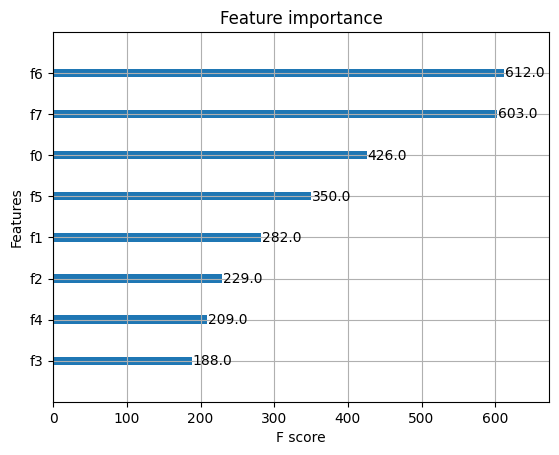

In [ ]:
xgb.plot_importance(model)
plt.show()